In [1]:
# std
import os
import sys
import re

# 3rd party
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def get_path(filename, dirname=None):
    root = os.path.dirname(os.path.dirname(os.getcwd()))
    path = os.path.join(root, dirname, filename) if dirname else os.path.join(root, filename)

    return path

In [3]:
path = get_path('hntn_train_validate_and_test_wn18rr_200d_cost.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Pretrained-Word-Vectors/results/hntn_train_validate_and_test_wn18rr_200d_cost.csv'

In [4]:
results_cost = pd.read_csv(path)
results_cost.head()

,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis,cost_training_baseline,cost_validation_baseline,cost_test_baseline
0,0.001007,0.000997,0.001013,0.008610,0.008526,0.008345
1,0.000818,0.000818,0.000830,0.005669,0.005602,0.005545
2,0.000747,0.000748,0.000753,0.005074,0.004928,0.004944
3,0.001038,0.001027,0.001049,0.004520,0.004336,0.004359
4,0.000684,0.000679,0.000687,0.003339,0.003215,0.003258


In [5]:
results_cost = results_cost.reset_index()
results_cost.head()

,index,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis,cost_training_baseline,cost_validation_baseline,cost_test_baseline
0,0,0.001007,0.000997,0.001013,0.008610,0.008526,0.008345
1,1,0.000818,0.000818,0.000830,0.005669,0.005602,0.005545
2,2,0.000747,0.000748,0.000753,0.005074,0.004928,0.004944
3,3,0.001038,0.001027,0.001049,0.004520,0.004336,0.004359
4,4,0.000684,0.000679,0.000687,0.003339,0.003215,0.003258


In [6]:
results_cost = results_cost.rename(columns={'index': 'epoch'})
results_cost.head()

,epoch,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis,cost_training_baseline,cost_validation_baseline,cost_test_baseline
0,0,0.001007,0.000997,0.001013,0.008610,0.008526,0.008345
1,1,0.000818,0.000818,0.000830,0.005669,0.005602,0.005545
2,2,0.000747,0.000748,0.000753,0.005074,0.004928,0.004944
3,3,0.001038,0.001027,0.001049,0.004520,0.004336,0.004359
4,4,0.000684,0.000679,0.000687,0.003339,0.003215,0.003258


In [7]:
results_cost['epoch'] += 1
results_cost.head()

,epoch,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis,cost_training_baseline,cost_validation_baseline,cost_test_baseline
0,1,0.001007,0.000997,0.001013,0.008610,0.008526,0.008345
1,2,0.000818,0.000818,0.000830,0.005669,0.005602,0.005545
2,3,0.000747,0.000748,0.000753,0.005074,0.004928,0.004944
3,4,0.001038,0.001027,0.001049,0.004520,0.004336,0.004359
4,5,0.000684,0.000679,0.000687,0.003339,0.003215,0.003258


In [8]:
results_cost = results_cost.drop(['cost_test_baseline', 'cost_test_hypothesis'], axis=1)
results_cost.head()

,epoch,cost_training_hypothesis,cost_validation_hypothesis,cost_training_baseline,cost_validation_baseline
0,1,0.001007,0.000997,0.008610,0.008526
1,2,0.000818,0.000818,0.005669,0.005602
2,3,0.000747,0.000748,0.005074,0.004928
3,4,0.001038,0.001027,0.004520,0.004336
4,5,0.000684,0.000679,0.003339,0.003215


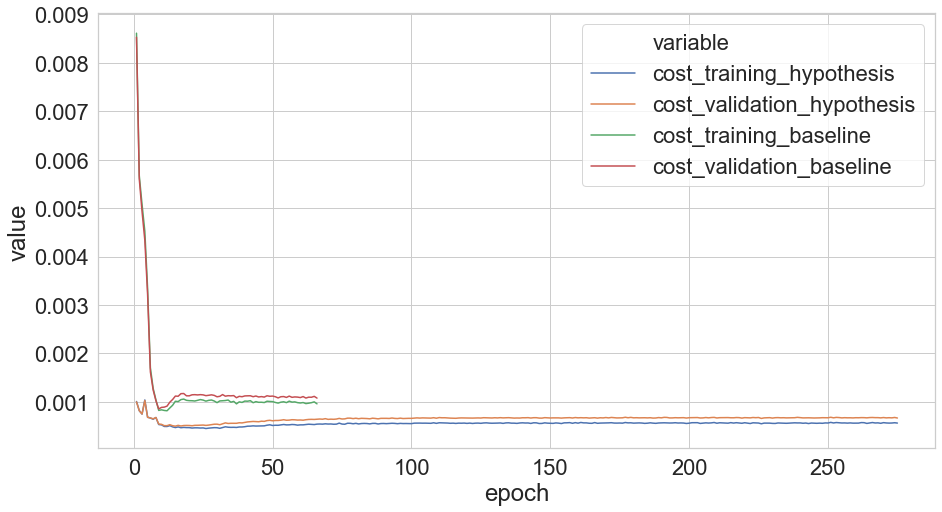

In [9]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_cost, ['epoch']))
plt.savefig('WN18RR_Cost_Results.png', bbox_inches = "tight", format='PNG')

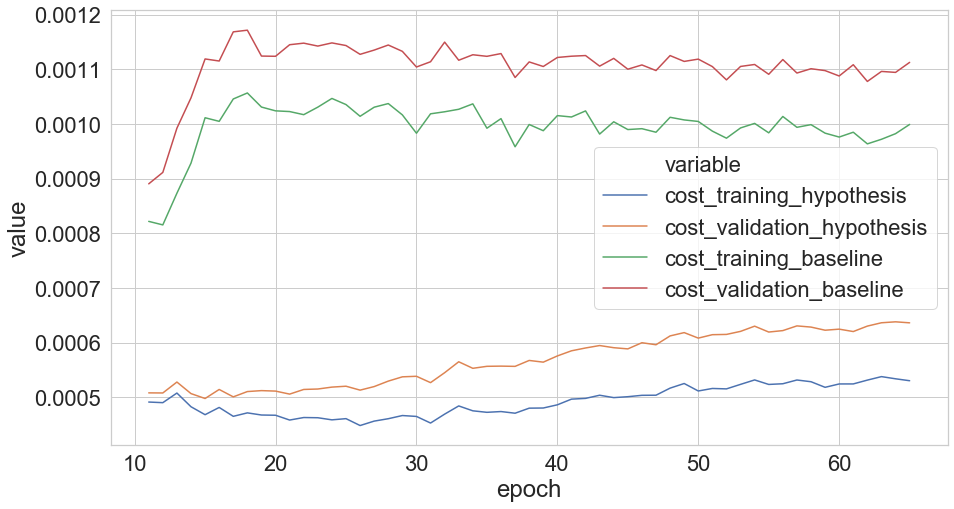

In [10]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_cost[10:65], ['epoch']))
plt.savefig('WN18RR_Cost_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [11]:
path = get_path('hntn_train_validate_and_test_wn18rr_200d_hits_at_10.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Pretrained-Word-Vectors/results/hntn_train_validate_and_test_wn18rr_200d_hits_at_10.csv'

In [12]:
results_hits_at_10 = pd.read_csv(path)
results_hits_at_10.head()

,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline
0,0.011206,0.011701,0.010211,0.020435,0.023401,0.022017
1,0.013019,0.013184,0.014359,0.032630,0.031312,0.032387
2,0.015821,0.015491,0.017549,0.035102,0.034773,0.033504
3,0.015162,0.012525,0.012285,0.033619,0.036750,0.035737
4,0.023566,0.027027,0.027281,0.040705,0.038893,0.040204


In [13]:
results_hits_at_10 = results_hits_at_10.reset_index()
results_hits_at_10.head()

,index,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline
0,0,0.011206,0.011701,0.010211,0.020435,0.023401,0.022017
1,1,0.013019,0.013184,0.014359,0.032630,0.031312,0.032387
2,2,0.015821,0.015491,0.017549,0.035102,0.034773,0.033504
3,3,0.015162,0.012525,0.012285,0.033619,0.036750,0.035737
4,4,0.023566,0.027027,0.027281,0.040705,0.038893,0.040204


In [14]:
results_hits_at_10 = results_hits_at_10.rename(columns={'index': 'epoch'})
results_hits_at_10.head()

,epoch,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline
0,0,0.011206,0.011701,0.010211,0.020435,0.023401,0.022017
1,1,0.013019,0.013184,0.014359,0.032630,0.031312,0.032387
2,2,0.015821,0.015491,0.017549,0.035102,0.034773,0.033504
3,3,0.015162,0.012525,0.012285,0.033619,0.036750,0.035737
4,4,0.023566,0.027027,0.027281,0.040705,0.038893,0.040204


In [15]:
results_hits_at_10['epoch'] += 1
results_hits_at_10.head()

,epoch,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline
0,1,0.011206,0.011701,0.010211,0.020435,0.023401,0.022017
1,2,0.013019,0.013184,0.014359,0.032630,0.031312,0.032387
2,3,0.015821,0.015491,0.017549,0.035102,0.034773,0.033504
3,4,0.015162,0.012525,0.012285,0.033619,0.036750,0.035737
4,5,0.023566,0.027027,0.027281,0.040705,0.038893,0.040204


In [16]:
results_hits_at_10_test = results_hits_at_10[['hits_at_10_test_baseline', 'hits_at_10_test_hypothesis']]
results_hits_at_10_test.head()

,hits_at_10_test_baseline,hits_at_10_test_hypothesis
0,0.022017,0.010211
1,0.032387,0.014359
2,0.033504,0.017549
3,0.035737,0.012285
4,0.040204,0.027281


In [17]:
results_hits_at_10_test.max()

hits_at_10_test_baseline      0.501914
hits_at_10_test_hypothesis    0.552010
dtype: float64

In [18]:
results_hits_at_10 = results_hits_at_10.drop(['hits_at_10_test_baseline', 'hits_at_10_test_hypothesis'], axis=1)
results_hits_at_10.head()

,epoch,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline
0,1,0.011206,0.011701,0.020435,0.023401
1,2,0.013019,0.013184,0.032630,0.031312
2,3,0.015821,0.015491,0.035102,0.034773
3,4,0.015162,0.012525,0.033619,0.036750
4,5,0.023566,0.027027,0.040705,0.038893


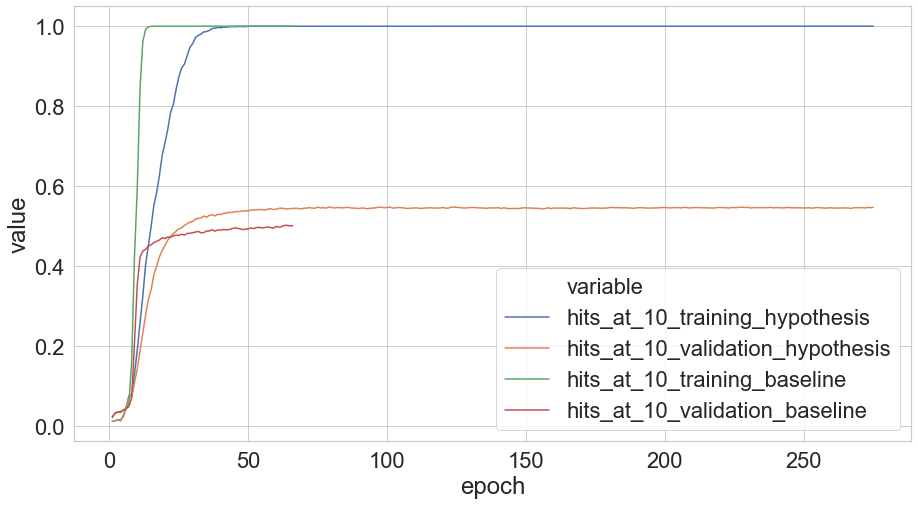

In [19]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_10, ['epoch']))
plt.savefig('WN18RR_hits_at_10_Results.png', bbox_inches = "tight", format='PNG')

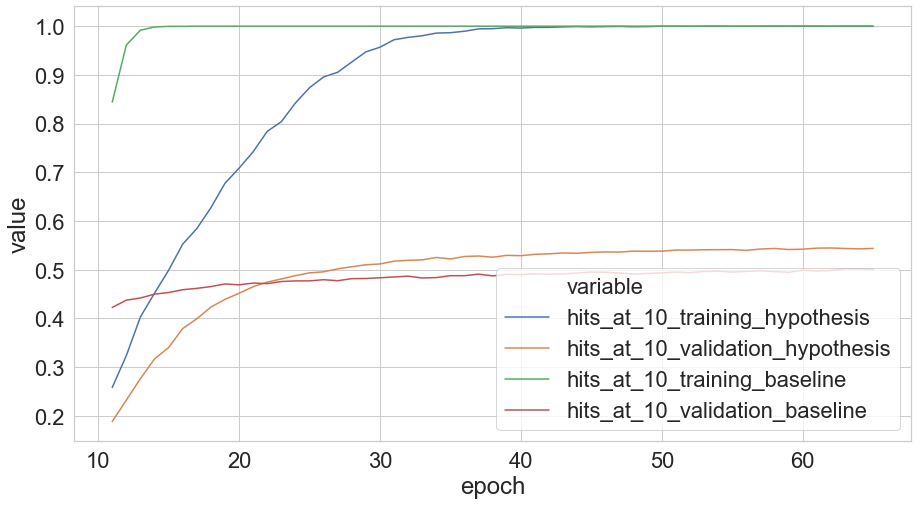

In [20]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_10[10:65], ['epoch']))
plt.savefig('WN18RR_hits_at_10_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [21]:
path = get_path('hntn_train_validate_and_test_wn18rr_200d_hits_at_3.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Pretrained-Word-Vectors/results/hntn_train_validate_and_test_wn18rr_200d_hits_at_3.csv'

In [22]:
results_hits_at_3 = pd.read_csv(path)
results_hits_at_3.head()

,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline
0,0.004614,0.004450,0.003669,0.010053,0.009723,0.010849
1,0.004944,0.004285,0.007020,0.016809,0.015985,0.016752
2,0.007086,0.007416,0.008615,0.019776,0.018787,0.019783
3,0.005933,0.004285,0.005105,0.019281,0.016974,0.021059
4,0.013184,0.014338,0.016911,0.019446,0.020270,0.022495


In [23]:
results_hits_at_3 = results_hits_at_3.reset_index()
results_hits_at_3.head()

,index,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline
0,0,0.004614,0.004450,0.003669,0.010053,0.009723,0.010849
1,1,0.004944,0.004285,0.007020,0.016809,0.015985,0.016752
2,2,0.007086,0.007416,0.008615,0.019776,0.018787,0.019783
3,3,0.005933,0.004285,0.005105,0.019281,0.016974,0.021059
4,4,0.013184,0.014338,0.016911,0.019446,0.020270,0.022495


In [24]:
results_hits_at_3 = results_hits_at_3.rename(columns={'index': 'epoch'})
results_hits_at_3.head()

,epoch,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline
0,0,0.004614,0.004450,0.003669,0.010053,0.009723,0.010849
1,1,0.004944,0.004285,0.007020,0.016809,0.015985,0.016752
2,2,0.007086,0.007416,0.008615,0.019776,0.018787,0.019783
3,3,0.005933,0.004285,0.005105,0.019281,0.016974,0.021059
4,4,0.013184,0.014338,0.016911,0.019446,0.020270,0.022495


In [25]:
results_hits_at_3['epoch'] += 1
results_hits_at_3.head()

,epoch,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline
0,1,0.004614,0.004450,0.003669,0.010053,0.009723,0.010849
1,2,0.004944,0.004285,0.007020,0.016809,0.015985,0.016752
2,3,0.007086,0.007416,0.008615,0.019776,0.018787,0.019783
3,4,0.005933,0.004285,0.005105,0.019281,0.016974,0.021059
4,5,0.013184,0.014338,0.016911,0.019446,0.020270,0.022495


In [26]:
results_hits_at_3_test = results_hits_at_3[['hits_at_3_test_baseline', 'hits_at_3_test_hypothesis']]
results_hits_at_3_test.head()

,hits_at_3_test_baseline,hits_at_3_test_hypothesis
0,0.010849,0.003669
1,0.016752,0.007020
2,0.019783,0.008615
3,0.021059,0.005105
4,0.022495,0.016911


In [27]:
results_hits_at_3_test.max()

hits_at_3_test_baseline      0.462348
hits_at_3_test_hypothesis    0.480536
dtype: float64

In [28]:
results_hits_at_3 = results_hits_at_3.drop(['hits_at_3_test_baseline', 'hits_at_3_test_hypothesis'], axis=1)
results_hits_at_3.head()

,epoch,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline
0,1,0.004614,0.004450,0.010053,0.009723
1,2,0.004944,0.004285,0.016809,0.015985
2,3,0.007086,0.007416,0.019776,0.018787
3,4,0.005933,0.004285,0.019281,0.016974
4,5,0.013184,0.014338,0.019446,0.020270


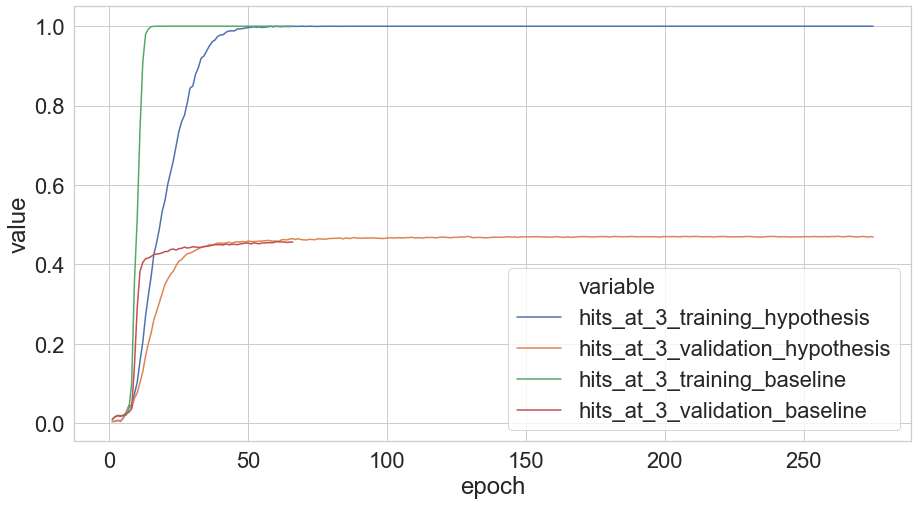

In [29]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_3, ['epoch']))
plt.savefig('WN18RR_hits_at_3_Results.png', bbox_inches = "tight", format='PNG')

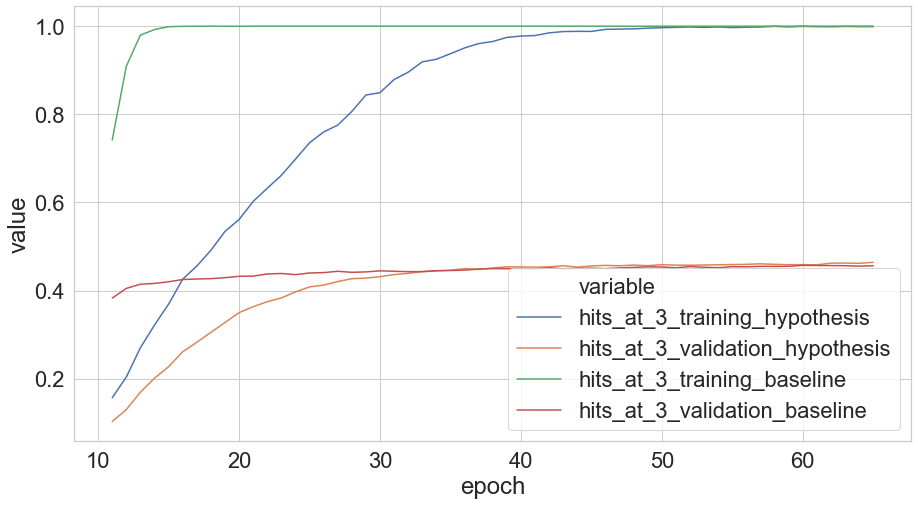

In [62]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_3[10:65], ['epoch']))
plt.savefig('WN18RR_hits_at_3_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [31]:
path = get_path('hntn_train_validate_and_test_wn18rr_200d_hits_at_1.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Pretrained-Word-Vectors/results/hntn_train_validate_and_test_wn18rr_200d_hits_at_1.csv'

In [32]:
results_hits_at_1 = pd.read_csv(path)
results_hits_at_1.head()

,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline
0,0.002307,0.001813,0.002234,0.005274,0.005274,0.006860
1,0.002472,0.002142,0.004308,0.007746,0.006262,0.008137
2,0.003790,0.003790,0.006860,0.007746,0.006262,0.008296
3,0.003461,0.001978,0.002393,0.011042,0.009064,0.011487
4,0.005933,0.006262,0.006222,0.011371,0.013184,0.014837


In [33]:
results_hits_at_1 = results_hits_at_1.reset_index()
results_hits_at_1.head()

,index,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline
0,0,0.002307,0.001813,0.002234,0.005274,0.005274,0.006860
1,1,0.002472,0.002142,0.004308,0.007746,0.006262,0.008137
2,2,0.003790,0.003790,0.006860,0.007746,0.006262,0.008296
3,3,0.003461,0.001978,0.002393,0.011042,0.009064,0.011487
4,4,0.005933,0.006262,0.006222,0.011371,0.013184,0.014837


In [34]:
results_hits_at_1 = results_hits_at_1.rename(columns={'index': 'epoch'})
results_hits_at_1.head()

,epoch,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline
0,0,0.002307,0.001813,0.002234,0.005274,0.005274,0.006860
1,1,0.002472,0.002142,0.004308,0.007746,0.006262,0.008137
2,2,0.003790,0.003790,0.006860,0.007746,0.006262,0.008296
3,3,0.003461,0.001978,0.002393,0.011042,0.009064,0.011487
4,4,0.005933,0.006262,0.006222,0.011371,0.013184,0.014837


In [35]:
results_hits_at_1['epoch'] += 1
results_hits_at_1.head()

,epoch,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline
0,1,0.002307,0.001813,0.002234,0.005274,0.005274,0.006860
1,2,0.002472,0.002142,0.004308,0.007746,0.006262,0.008137
2,3,0.003790,0.003790,0.006860,0.007746,0.006262,0.008296
3,4,0.003461,0.001978,0.002393,0.011042,0.009064,0.011487
4,5,0.005933,0.006262,0.006222,0.011371,0.013184,0.014837


In [36]:
results_hits_at_1_test = results_hits_at_1[['hits_at_1_test_baseline', 'hits_at_1_test_hypothesis']]
results_hits_at_1_test.head()

,hits_at_1_test_baseline,hits_at_1_test_hypothesis
0,0.006860,0.002234
1,0.008137,0.004308
2,0.008296,0.006860
3,0.011487,0.002393
4,0.014837,0.006222


In [37]:
results_hits_at_1_test.max()

hits_at_1_test_baseline      0.425335
hits_at_1_test_hypothesis    0.432674
dtype: float64

In [38]:
results_hits_at_1 = results_hits_at_1.drop(['hits_at_1_test_baseline', 'hits_at_1_test_hypothesis'], axis=1)
results_hits_at_1.head()

,epoch,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline
0,1,0.002307,0.001813,0.005274,0.005274
1,2,0.002472,0.002142,0.007746,0.006262
2,3,0.003790,0.003790,0.007746,0.006262
3,4,0.003461,0.001978,0.011042,0.009064
4,5,0.005933,0.006262,0.011371,0.013184


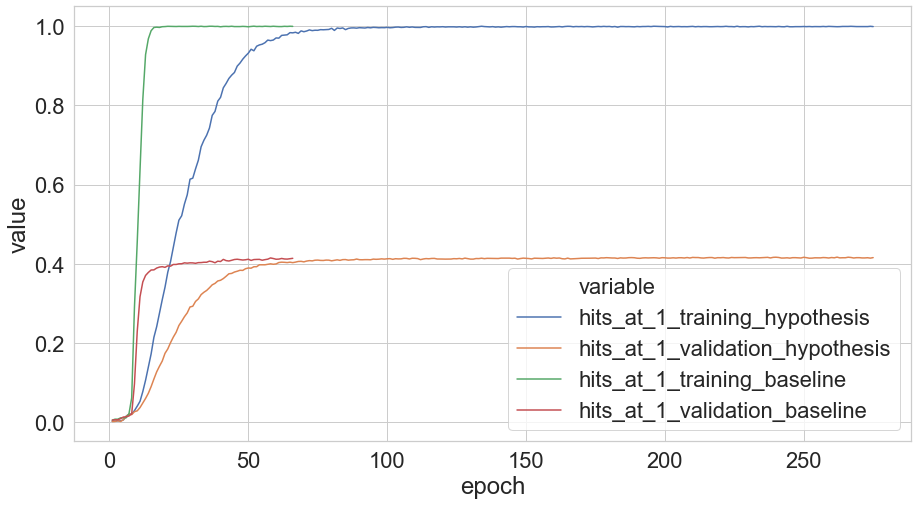

In [39]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_1, ['epoch']))
plt.savefig('WN18RR_hits_at_1_Results.png', bbox_inches = "tight", format='PNG')

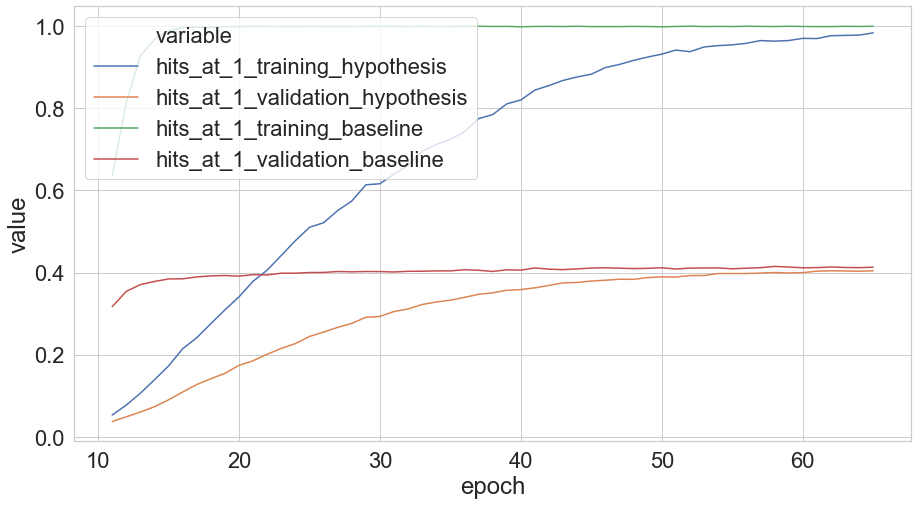

In [40]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_1[10:65], ['epoch']))
plt.savefig('WN18RR_hits_at_1_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [41]:
path = get_path('hntn_train_validate_and_test_wn18rr_200d_mean_rank.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Pretrained-Word-Vectors/results/hntn_train_validate_and_test_wn18rr_200d_mean_rank.csv'

In [42]:
results_mean_rank = pd.read_csv(path)
results_mean_rank.head()

,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline
0,19695.943968,20106.040870,20598.809668,14995.838332,17480.652274,17686.082163
1,18635.815260,19177.188036,19426.875239,12383.254614,16190.873105,16253.538609
2,16812.638102,17414.912657,17656.270740,10237.962096,15631.999341,15727.852106
3,18037.795155,18610.793507,19001.299298,9141.468853,15175.690013,15349.521857
4,12414.917765,13737.711602,14081.789726,7874.899308,14246.901945,14369.990268


In [43]:
results_mean_rank = results_mean_rank.reset_index()
results_mean_rank.head()

,index,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline
0,0,19695.943968,20106.040870,20598.809668,14995.838332,17480.652274,17686.082163
1,1,18635.815260,19177.188036,19426.875239,12383.254614,16190.873105,16253.538609
2,2,16812.638102,17414.912657,17656.270740,10237.962096,15631.999341,15727.852106
3,3,18037.795155,18610.793507,19001.299298,9141.468853,15175.690013,15349.521857
4,4,12414.917765,13737.711602,14081.789726,7874.899308,14246.901945,14369.990268


In [44]:
results_mean_rank = results_mean_rank.rename(columns={'index': 'epoch'})
results_mean_rank.head()

,epoch,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline
0,0,19695.943968,20106.040870,20598.809668,14995.838332,17480.652274,17686.082163
1,1,18635.815260,19177.188036,19426.875239,12383.254614,16190.873105,16253.538609
2,2,16812.638102,17414.912657,17656.270740,10237.962096,15631.999341,15727.852106
3,3,18037.795155,18610.793507,19001.299298,9141.468853,15175.690013,15349.521857
4,4,12414.917765,13737.711602,14081.789726,7874.899308,14246.901945,14369.990268


In [45]:
results_mean_rank['epoch'] += 1
results_mean_rank.head()

,epoch,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline
0,1,19695.943968,20106.040870,20598.809668,14995.838332,17480.652274,17686.082163
1,2,18635.815260,19177.188036,19426.875239,12383.254614,16190.873105,16253.538609
2,3,16812.638102,17414.912657,17656.270740,10237.962096,15631.999341,15727.852106
3,4,18037.795155,18610.793507,19001.299298,9141.468853,15175.690013,15349.521857
4,5,12414.917765,13737.711602,14081.789726,7874.899308,14246.901945,14369.990268


In [46]:
results_mean_rank_test = results_mean_rank[['mean_rank_test_baseline', 'mean_rank_test_hypothesis']]
results_mean_rank_test.head()

,mean_rank_test_baseline,mean_rank_test_hypothesis
0,17686.082163,20598.809668
1,16253.538609,19426.875239
2,15727.852106,17656.270740
3,15349.521857,19001.299298
4,14369.990268,14081.789726


In [47]:
results_mean_rank_test.min()

mean_rank_test_baseline      5718.803287
mean_rank_test_hypothesis    1586.342055
dtype: float64

In [48]:
results_mean_rank = results_mean_rank.drop(['mean_rank_test_baseline', 'mean_rank_test_hypothesis'], axis=1)
results_mean_rank.head()

,epoch,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline
0,1,19695.943968,20106.040870,14995.838332,17480.652274
1,2,18635.815260,19177.188036,12383.254614,16190.873105
2,3,16812.638102,17414.912657,10237.962096,15631.999341
3,4,18037.795155,18610.793507,9141.468853,15175.690013
4,5,12414.917765,13737.711602,7874.899308,14246.901945


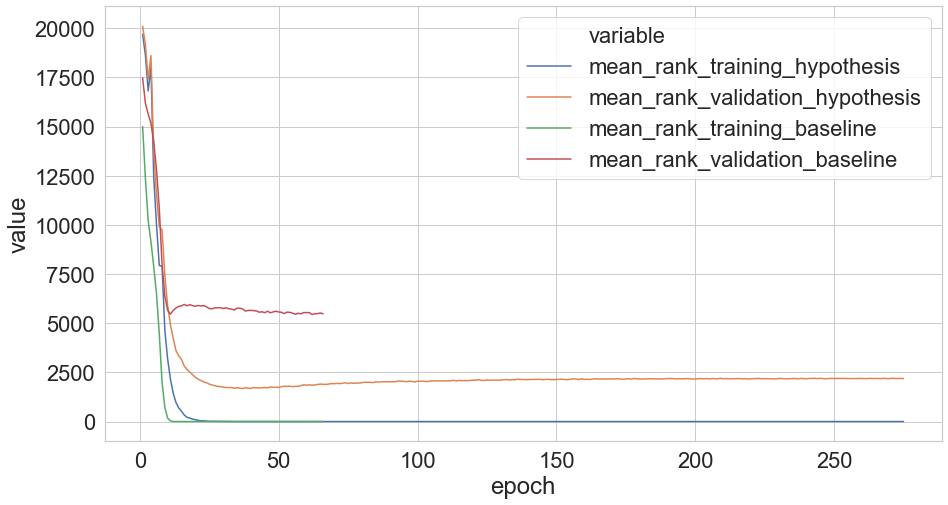

In [49]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_rank, ['epoch']))
plt.savefig('WN18RR_mean_rank_Results.png', bbox_inches = "tight", format='PNG')

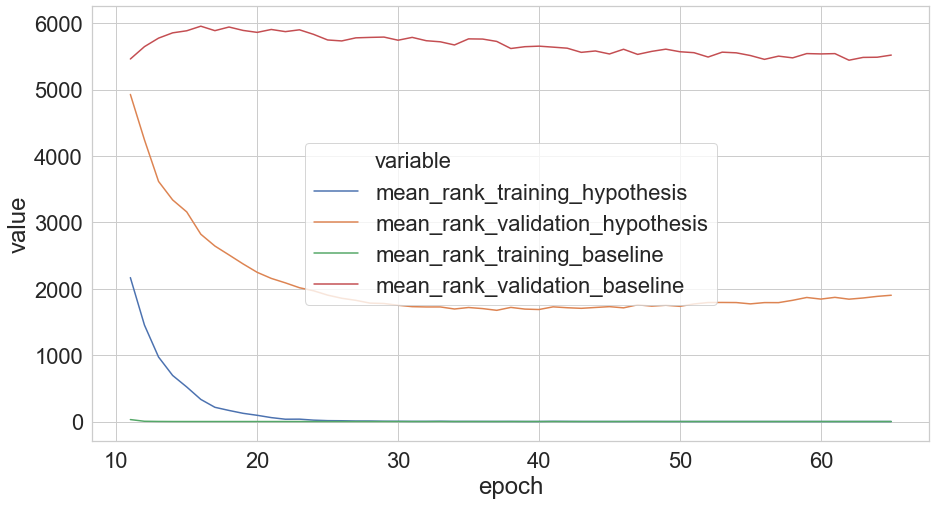

In [50]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_rank[10:65], ['epoch']))
plt.savefig('WN18RR_mean_rank_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [51]:
path = get_path('hntn_train_validate_and_test_wn18rr_200d_mean_reciprocal_rank.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Pretrained-Word-Vectors/results/hntn_train_validate_and_test_wn18rr_200d_mean_reciprocal_rank.csv'

In [52]:
results_mean_reciprocal_rank = pd.read_csv(path)
results_mean_reciprocal_rank.head()

,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline
0,0.004559,0.004447,0.004109,0.009832,0.010205,0.011293
1,0.005645,0.005187,0.007538,0.016084,0.015046,0.016316
2,0.007982,0.008155,0.010574,0.017365,0.015933,0.017261
3,0.007028,0.005287,0.005621,0.019418,0.018065,0.020125
4,0.013462,0.014121,0.015281,0.021235,0.021963,0.023641


In [53]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.reset_index()
results_mean_reciprocal_rank.head()

,index,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline
0,0,0.004559,0.004447,0.004109,0.009832,0.010205,0.011293
1,1,0.005645,0.005187,0.007538,0.016084,0.015046,0.016316
2,2,0.007982,0.008155,0.010574,0.017365,0.015933,0.017261
3,3,0.007028,0.005287,0.005621,0.019418,0.018065,0.020125
4,4,0.013462,0.014121,0.015281,0.021235,0.021963,0.023641


In [54]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.rename(columns={'index': 'epoch'})
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline
0,0,0.004559,0.004447,0.004109,0.009832,0.010205,0.011293
1,1,0.005645,0.005187,0.007538,0.016084,0.015046,0.016316
2,2,0.007982,0.008155,0.010574,0.017365,0.015933,0.017261
3,3,0.007028,0.005287,0.005621,0.019418,0.018065,0.020125
4,4,0.013462,0.014121,0.015281,0.021235,0.021963,0.023641


In [55]:
results_mean_reciprocal_rank['epoch'] += 1
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline
0,1,0.004559,0.004447,0.004109,0.009832,0.010205,0.011293
1,2,0.005645,0.005187,0.007538,0.016084,0.015046,0.016316
2,3,0.007982,0.008155,0.010574,0.017365,0.015933,0.017261
3,4,0.007028,0.005287,0.005621,0.019418,0.018065,0.020125
4,5,0.013462,0.014121,0.015281,0.021235,0.021963,0.023641


In [56]:
results_mean_reciprocal_rank_test = results_mean_reciprocal_rank[['mean_reciprocal_rank_test_baseline', 'mean_reciprocal_rank_test_hypothesis']]
results_mean_reciprocal_rank_test.head()

,mean_reciprocal_rank_test_baseline,mean_reciprocal_rank_test_hypothesis
0,0.011293,0.004109
1,0.016316,0.007538
2,0.017261,0.010574
3,0.020125,0.005621
4,0.023641,0.015281


In [57]:
results_mean_reciprocal_rank_test.max()

mean_reciprocal_rank_test_baseline      0.451051
mean_reciprocal_rank_test_hypothesis    0.470936
dtype: float64

In [58]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.drop(['mean_reciprocal_rank_test_baseline', 'mean_reciprocal_rank_test_hypothesis'], axis=1)
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline
0,1,0.004559,0.004447,0.009832,0.010205
1,2,0.005645,0.005187,0.016084,0.015046
2,3,0.007982,0.008155,0.017365,0.015933
3,4,0.007028,0.005287,0.019418,0.018065
4,5,0.013462,0.014121,0.021235,0.021963


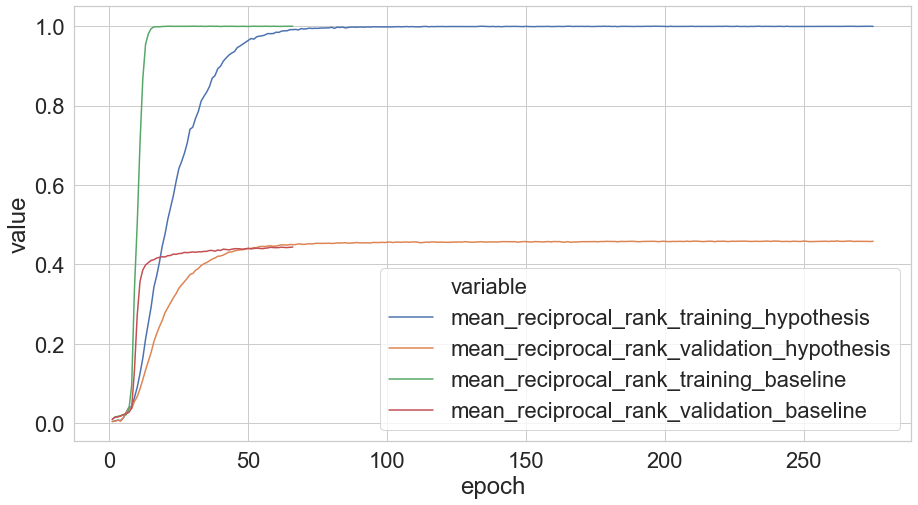

In [59]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_reciprocal_rank, ['epoch']))
plt.savefig('WN18RR_mean_reciprocal_rank_Results.png', bbox_inches = "tight", format='PNG')

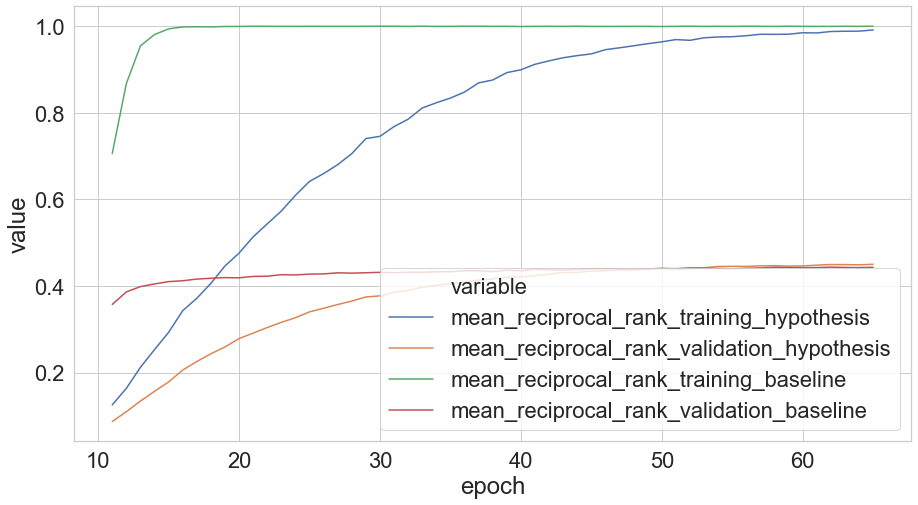

In [61]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_reciprocal_rank[10:65], ['epoch']))
plt.savefig('WN18RR_mean_reciprocal_rank_Results_Clipped.png', bbox_inches = "tight", format='PNG')